In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [2]:
data=pd.read_csv('training_data.csv')

In [35]:
test=pd.read_csv('test_data.csv')

In [4]:
data=data.drop('Unnamed: 0', axis=1)

In [7]:
label_encoder = LabelEncoder()

In [9]:
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

In [10]:
data.head()

,amount_tsh,days_since_recorded,funder,gps_height,installer,basin,subvillage,population,public_meeting,scheme_management,...,construction_year,extraction_type,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,62.0,995,other,1390,other,Lake Nyasa,Mnyusi B,109,True,vwc,...,90s,gravity,annually,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,272,other,1399,other,Lake Victoria,Nyamara,280,Unknown,other,...,10s,gravity,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,13.0,281,other,686,other,Pangani,Majengo,250,True,vwc,...,00s,gravity,per bucket,soft,enough,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0.0,309,Unicef,263,other,Ruvuma / Southern Coast,Mahakamani,58,True,vwc,...,80s,submersible,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,0.0,874,other,0,other,Lake Victoria,Kyanyamisa,0,True,other,...,unknown,gravity,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [11]:
corr = data.corr()

In [12]:
corr

,amount_tsh,days_since_recorded,gps_height,population
amount_tsh,1.000000,0.037082,0.314981,0.084658
days_since_recorded,0.037082,1.000000,-0.255878,-0.099737
gps_height,0.314981,-0.255878,1.000000,0.135003
population,0.084658,-0.099737,0.135003,1.000000


In [13]:
from sklearn.preprocessing import LabelEncoder
data=data.apply(LabelEncoder().fit_transform)

In [14]:
data.head()

,amount_tsh,days_since_recorded,funder,gps_height,installer,basin,subvillage,population,public_meeting,scheme_management,...,construction_year,extraction_type,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,62,308,8,1448,7,1,11807,109,1,6,...,5,1,0,6,1,6,0,1,1,0
1,0,46,8,1457,7,4,15838,276,2,2,...,1,1,2,6,2,3,1,1,1,0
2,13,55,8,744,7,5,9074,247,1,6,...,0,1,5,6,1,1,1,2,1,0
3,0,83,3,322,7,7,8982,58,1,6,...,4,8,2,6,0,0,0,2,1,2
4,0,251,8,59,7,4,7698,0,1,2,...,6,1,2,6,3,3,1,1,1,0


In [15]:
corr=data.corr()

In [16]:
corr

,amount_tsh,days_since_recorded,funder,gps_height,installer,basin,subvillage,population,public_meeting,scheme_management,...,construction_year,extraction_type,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
amount_tsh,1.000000,0.040197,-0.043528,0.315221,-0.001700,0.138512,0.008558,0.161951,0.015730,0.063946,...,-0.273622,-0.106519,-0.335695,0.048256,-0.039899,-0.030391,0.088391,-0.184484,-0.183345,-0.202578
days_since_recorded,0.040197,1.000000,-0.038048,-0.279187,-0.087010,0.206706,-0.062939,-0.188427,-0.094376,-0.065213,...,0.184553,0.049948,-0.255302,-0.020410,-0.042467,0.042499,0.041379,-0.031434,-0.021218,-0.025456
funder,-0.043528,-0.038048,1.000000,-0.024028,0.154870,0.022691,0.011657,0.051504,0.059163,-0.033738,...,-0.068286,0.049989,0.095296,-0.063741,-0.011148,-0.074819,0.003931,0.012562,0.009434,-0.043570
gps_height,0.315221,-0.279187,-0.024028,1.000000,0.021451,-0.161340,0.003941,0.254722,0.025354,0.027334,...,-0.484836,-0.297839,-0.097296,0.140480,-0.030762,0.124177,0.041949,-0.236665,-0.215881,-0.113867
installer,-0.001700,-0.087010,0.154870,0.021451,1.000000,0.080358,-0.011520,0.101049,-0.003503,-0.057240,...,-0.141000,0.035103,0.078990,-0.003624,0.082401,-0.138065,0.021601,-0.007337,-0.012208,-0.013457
basin,0.138512,0.206706,0.022691,-0.161340,0.080358,1.000000,0.057696,0.102339,0.016602,-0.041219,...,-0.214819,0.131235,-0.029961,-0.075529,-0.026707,-0.074808,0.031636,0.009864,0.013518,0.043413
subvillage,0.008558,-0.062939,0.011657,0.003941,-0.011520,0.057696,1.000000,0.016857,0.012726,0.000700,...,-0.042279,0.004133,0.022473,0.002076,0.006003,-0.025664,-0.012342,-0.017225,-0.019984,-0.006752
population,0.161951,-0.188427,0.051504,0.254722,0.101049,0.102339,0.016857,1.000000,0.045263,-0.079736,...,-0.323169,0.047661,0.034191,-0.041068,0.065545,-0.117792,0.076292,0.025741,0.005709,-0.013891
public_meeting,0.015730,-0.094376,0.059163,0.025354,-0.003503,0.016602,0.012726,0.045263,1.000000,0.019616,...,-0.023946,0.009791,0.124099,0.032079,-0.028307,-0.008829,-0.071904,-0.023053,-0.027216,-0.033983
scheme_management,0.063946,-0.065213,-0.033738,0.027334,-0.057240,-0.041219,0.000700,-0.079736,0.019616,1.000000,...,0.050211,-0.041816,-0.037621,0.044573,-0.131733,0.053290,-0.050297,-0.039097,-0.053811,-0.064742


In [17]:
sns.heatmap(corr)

In [18]:
plt.show

<function matplotlib.pyplot.show>

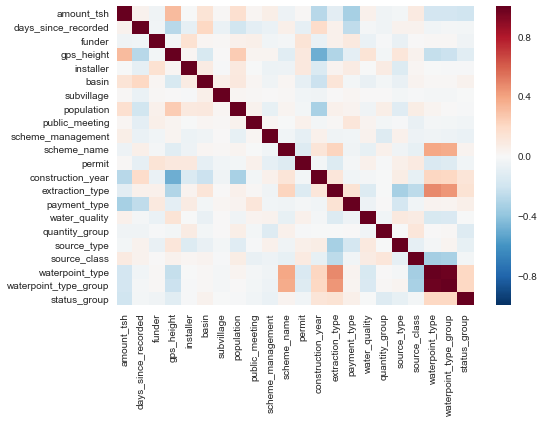

In [19]:
plt.show()

In [20]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [21]:
data.shape

(59400, 21)

In [22]:
selected_columns = selected_columns[1:].values
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

In [24]:
result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,0]

In [25]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [27]:
data.head()

,days_since_recorded,gps_height,basin,subvillage,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,status_group
0,308,1448,1,11807,109,1,6,2246,0,5,1,0,6,1,6,0,1,0
1,46,1457,4,15838,276,2,2,2171,1,1,1,2,6,2,3,1,1,0
2,55,744,5,9074,247,1,6,2121,1,0,1,5,6,1,1,1,2,0
3,83,322,7,8982,58,1,6,2171,1,4,8,2,6,0,0,0,2,2
4,251,59,4,7698,0,1,2,2171,1,6,1,2,6,3,3,1,1,0


In [28]:
X=data.drop('status_group',axis=1)
y=data['status_group']

In [29]:
y.head()

0    0
1    0
2    0
3    2
4    0
Name: status_group, dtype: int64

In [31]:
## Converting the Training dataframe into a matrix and predictor as y 
data_X = X.as_matrix()
data_y = y.tolist()

In [32]:
import sklearn.model_selection 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data_X, 
                                                                             data_y, 
                                                                             test_size = 0.3, 
                                                                             random_state = 0)

In [33]:
import sklearn.ensemble

rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=1000, 
                                              min_samples_split=6,
                                              criterion='gini', 
                                              max_features='auto',
                                              oob_score=True,
                                              random_state=1,
                                              n_jobs=-1)

In [34]:
rfc.fit(X_train, y_train)

print('Random Forest Classifier Train Accuracy Score :', rfc.score(X_train, y_train))
print('Random Forest Classifier Test Score :', rfc.score(X_test, y_test))

Random Forest Classifier Train Accuracy Score : 0.939538239538
Random Forest Classifier Test Score : 0.802805836139
